In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import utils
from sklearn import preprocessing
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import classification_report, f1_score, accuracy_score
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import utils
warnings.filterwarnings('ignore')

In [61]:
# reading data from csv and loading it
dataset=pd.read_csv("RTA Dataset.csv")

In [62]:
dataset.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


1 - Data Cleaning

In [63]:
#checking missing values
dataset.isna().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [64]:
#dropping columns with high number of missing values
dataset.drop(['Service_year_of_vehicle','Defect_of_vehicle','Work_of_casuality', 'Fitness_of_casuality'], axis = 1, inplace = True)

In [65]:
dataset.isna().sum()

Time                             0
Day_of_week                      0
Age_band_of_driver               0
Sex_of_driver                    0
Educational_level              741
Vehicle_driver_relation        579
Driving_experience             829
Type_of_vehicle                950
Owner_of_vehicle               482
Area_accident_occured          239
Lanes_or_Medians               385
Road_allignment                142
Types_of_Junction              887
Road_surface_type              172
Road_surface_conditions          0
Light_conditions                 0
Weather_conditions               0
Type_of_collision              155
Number_of_vehicles_involved      0
Number_of_casualties             0
Vehicle_movement               308
Casualty_class                   0
Sex_of_casualty                  0
Age_band_of_casualty             0
Casualty_severity                0
Pedestrian_movement              0
Cause_of_accident                0
Accident_severity                0
dtype: int64

In [66]:
categorical = ['Day_of_week', 'Age_band_of_driver', 'Sex_of_driver', 'Educational_level', 'Vehicle_driver_relation', 'Driving_experience', 'Type_of_vehicle', 'Owner_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction', 'Road_surface_type', 'Road_surface_conditions', 'Light_conditions', 'Weather_conditions', 'Type_of_collision', 'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity', 'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity']
print('The categorical variables are',categorical)

The categorical variables are ['Day_of_week', 'Age_band_of_driver', 'Sex_of_driver', 'Educational_level', 'Vehicle_driver_relation', 'Driving_experience', 'Type_of_vehicle', 'Owner_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction', 'Road_surface_type', 'Road_surface_conditions', 'Light_conditions', 'Weather_conditions', 'Type_of_collision', 'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity', 'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity']


In [67]:
#for categorical values we can replace the null values with Unknown
for i in categorical:
    dataset[i].fillna('Unknown',inplace=True)

In [68]:
#now no null values should be in cols
dataset.isna().sum()

Time                           0
Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Pedestrian_movement            0
Cause_of_accident              0
Accident_severity              0
dtype: int64

In [69]:
#checking col driving experience
dataset['Driving_experience'].unique()

array(['1-2yr', 'Above 10yr', '5-10yr', '2-5yr', 'Unknown', 'No Licence',
       'Below 1yr', 'unknown'], dtype=object)

In [70]:
for index, row in dataset.loc[:, ['Driving_experience']].iterrows():
    if(row['Driving_experience']=='unknown'):
        dataset.loc[index, 'Driving_experience'] = 'Unknown'

In [71]:
#removed small case unknowns
dataset['Driving_experience'].unique()

array(['1-2yr', 'Above 10yr', '5-10yr', '2-5yr', 'Unknown', 'No Licence',
       'Below 1yr'], dtype=object)

In [72]:
#checking col Type_of_vehicle
dataset['Type_of_vehicle'].unique()

array(['Automobile', 'Public (> 45 seats)', 'Lorry (41?100Q)', 'Unknown',
       'Public (13?45 seats)', 'Lorry (11?40Q)', 'Long lorry',
       'Public (12 seats)', 'Taxi', 'Pick up upto 10Q', 'Stationwagen',
       'Ridden horse', 'Other', 'Bajaj', 'Turbo', 'Motorcycle',
       'Special vehicle', 'Bicycle'], dtype=object)

In [73]:
#cleaning type of vehicle column
for index, row in dataset.loc[:, ['Type_of_vehicle']].iterrows():
    if(row['Type_of_vehicle']=='Public (> 45 seats)' or row['Type_of_vehicle']=='Public (12 seats)' or row['Type_of_vehicle']=='Public (13?45 seats)'):
        dataset.loc[index, 'Type_of_vehicle'] = 'Public'
    if(row['Type_of_vehicle']=='Lorry (41?100Q)' or row['Type_of_vehicle']=='Lorry (11?40Q)' or row['Type_of_vehicle']=='Long lorry'):
        dataset.loc[index, 'Type_of_vehicle'] = 'Lorry'

In [74]:
dataset['Type_of_vehicle'].unique()

array(['Automobile', 'Public', 'Lorry', 'Unknown', 'Taxi',
       'Pick up upto 10Q', 'Stationwagen', 'Ridden horse', 'Other',
       'Bajaj', 'Turbo', 'Motorcycle', 'Special vehicle', 'Bicycle'],
      dtype=object)

In [75]:
#cleaning keyword na from rows to Unknown
for col in dataset.columns:
    for index, row in dataset.loc[:, [col]].iterrows():
        if(row[col]=='na'):
            dataset.loc[index, col] = 'Unknown'

In [76]:
dataset.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,...,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Residential areas,...,2,2,Going straight,Unknown,Unknown,Unknown,Unknown,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public,Owner,Office areas,...,2,2,Going straight,Unknown,Unknown,Unknown,Unknown,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry,Owner,Recreational areas,...,2,2,Going straight,Driver or rider,Male,31-50,3,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public,Governmental,Office areas,...,2,2,Going straight,Pedestrian,Female,18-30,3,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Unknown,Owner,Industrial areas,...,2,2,Going straight,Unknown,Unknown,Unknown,Unknown,Not a Pedestrian,Overtaking,Slight Injury


In [77]:
# convert object type column into datetime datatype column
dataset['Time'] = pd.to_datetime(dataset['Time'])

In [78]:
dataframe = dataset.copy()
dataframe['Hour_of_Day'] = dataframe['Time'].dt.hour
dataframe = dataframe.drop('Time', axis=1)
dataframe.head()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,...,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity,Hour_of_Day
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Residential areas,Unknown,...,2,Going straight,Unknown,Unknown,Unknown,Unknown,Not a Pedestrian,Moving Backward,Slight Injury,17
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public,Owner,Office areas,Undivided Two way,...,2,Going straight,Unknown,Unknown,Unknown,Unknown,Not a Pedestrian,Overtaking,Slight Injury,17
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry,Owner,Recreational areas,other,...,2,Going straight,Driver or rider,Male,31-50,3,Not a Pedestrian,Changing lane to the left,Serious Injury,17
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public,Governmental,Office areas,other,...,2,Going straight,Pedestrian,Female,18-30,3,Not a Pedestrian,Changing lane to the right,Slight Injury,1
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Unknown,Owner,Industrial areas,other,...,2,Going straight,Unknown,Unknown,Unknown,Unknown,Not a Pedestrian,Overtaking,Slight Injury,1


2 - Data Exploration

In [79]:
#Target Variable Classification
print(dataframe['Accident_severity'].value_counts())

Accident_severity
Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: count, dtype: int64


<AxesSubplot: xlabel='Accident_severity'>

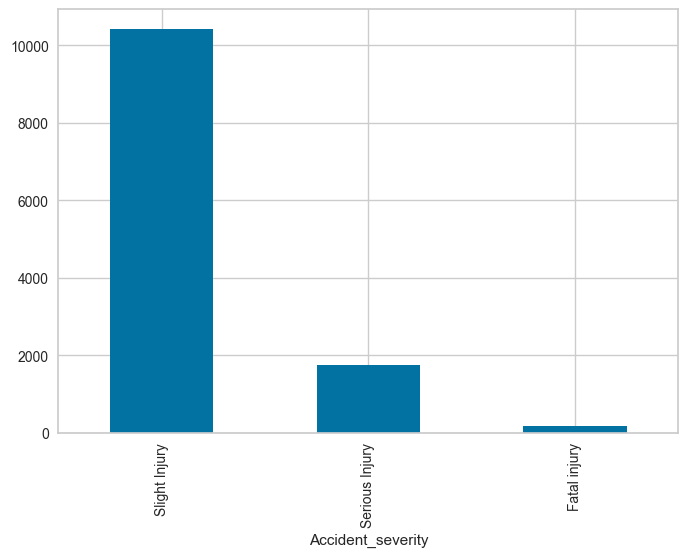

In [80]:
dataframe['Accident_severity'].value_counts().plot(kind='bar')

<AxesSubplot: xlabel='Educational_level'>

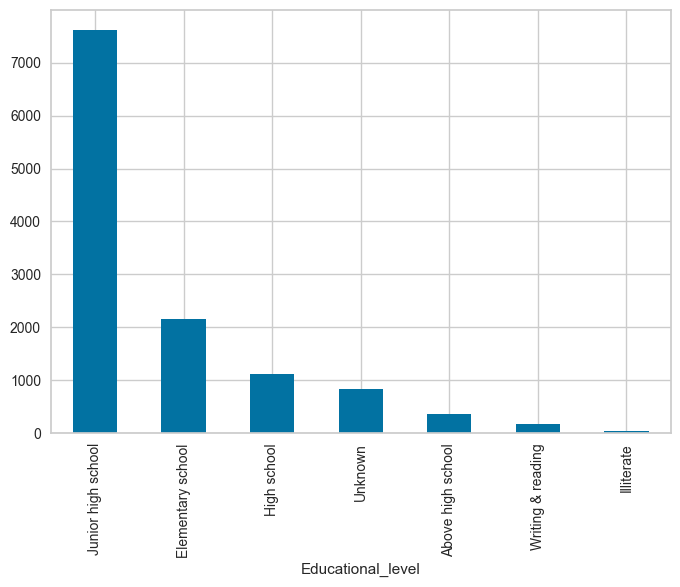

In [81]:
dataframe['Educational_level'].value_counts().plot(kind='bar')

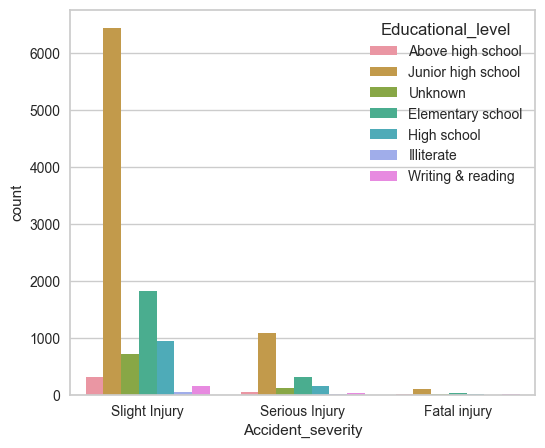

In [82]:
# Educational level with accident severity
plt.figure(figsize=(6,5))
sns.countplot(x='Accident_severity', data=dataframe,  hue="Educational_level")
plt.xticks(rotation=0)
plt.show()

Road_surface_type
Asphalt roads                       11296
Earth roads                           358
Gravel roads                          242
Unknown                               172
Other                                 167
Asphalt roads with some distress       81
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

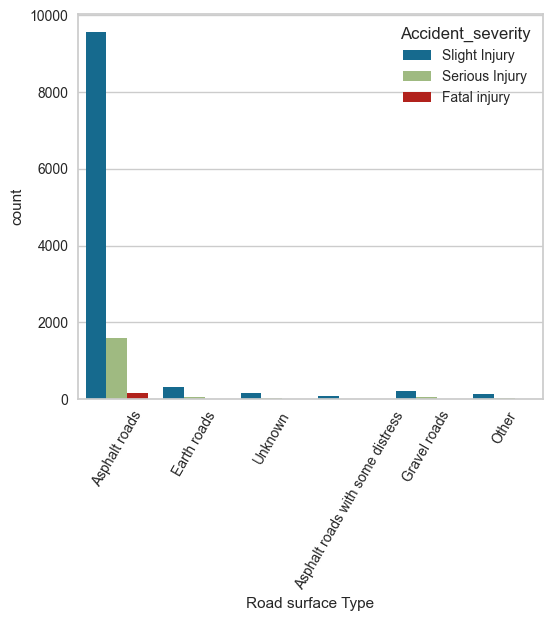

In [83]:
# Road Surface type with accident severity
print(dataframe['Road_surface_type'].value_counts())

plt.figure(figsize=(6,5))
sns.countplot(x='Road_surface_type', hue='Accident_severity', data=dataframe)
plt.xlabel('Road surface Type')
plt.xticks(rotation=60)
plt.show

Road_surface_conditions
Dry                     9340
Wet or damp             2904
Snow                      70
Flood over 3cm. deep       2
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

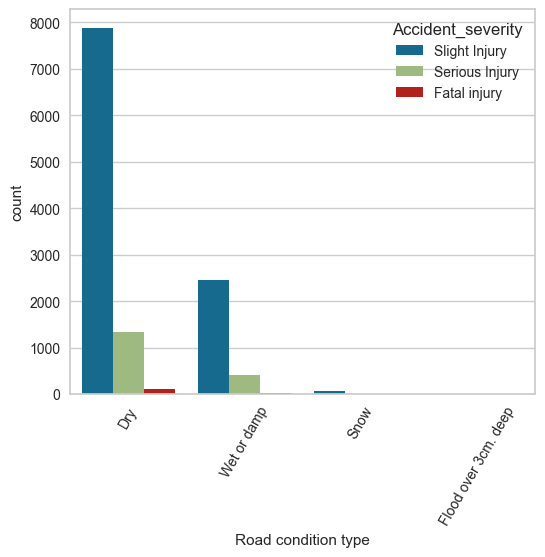

In [84]:
# Road Surface conditions with accident severity
print(dataframe['Road_surface_conditions'].value_counts())

plt.figure(figsize=(6,5))
sns.countplot(x='Road_surface_conditions', hue='Accident_severity', data=dataframe)
plt.xlabel('Road condition type')
plt.xticks(rotation=60)
plt.show

In [85]:
#data values for road surface type
dataframe_pivot_table = pd.pivot_table(data=dataframe, 
               index='Road_surface_conditions', 
               columns='Accident_severity',
               aggfunc='count')
road_surface_df = dataframe_pivot_table['Road_surface_type']
road_surface_df.fillna(0, inplace=True)
road_surface_df['sum of injuries'] = road_surface_df['Fatal injury'] + road_surface_df['Serious Injury'] + road_surface_df['Slight Injury']
road_surface_df


Accident_severity,Fatal injury,Serious Injury,Slight Injury,sum of injuries
Road_surface_conditions,,,,
Dry,121.0,1332.0,7887.0,9340.0
Flood over 3cm. deep,0.0,0.0,2.0,2.0
Snow,0.0,4.0,66.0,70.0
Wet or damp,37.0,407.0,2460.0,2904.0


Data Visualization for all categorical cols

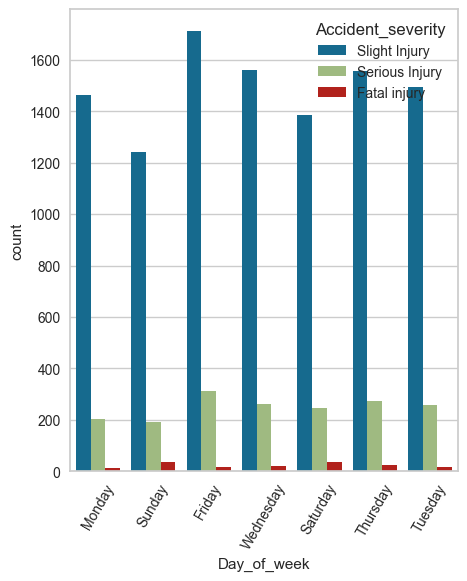

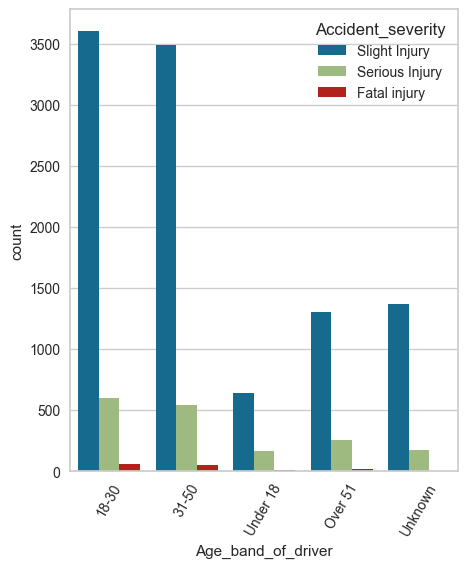

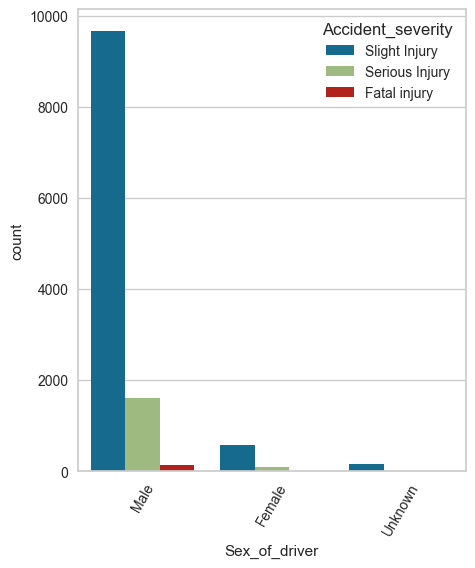

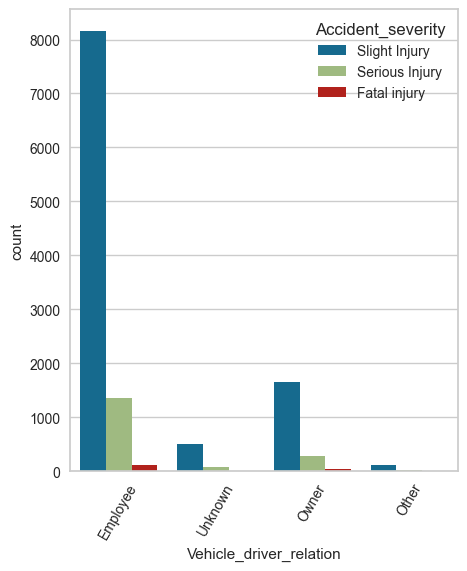

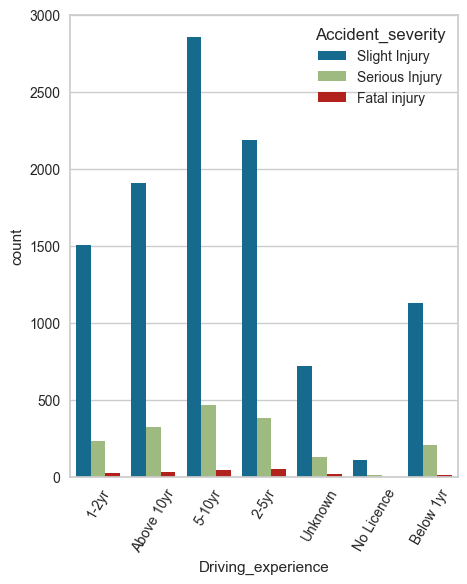

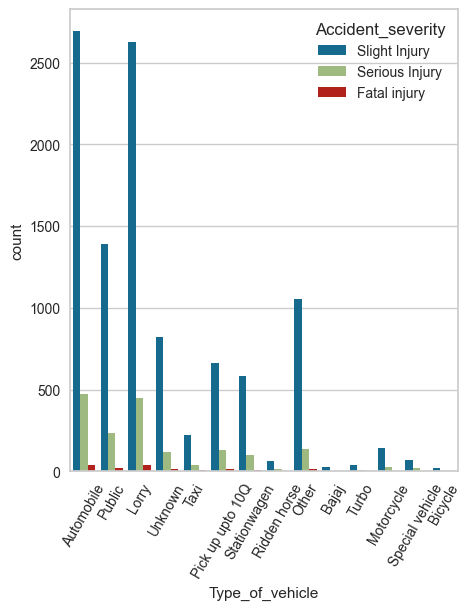

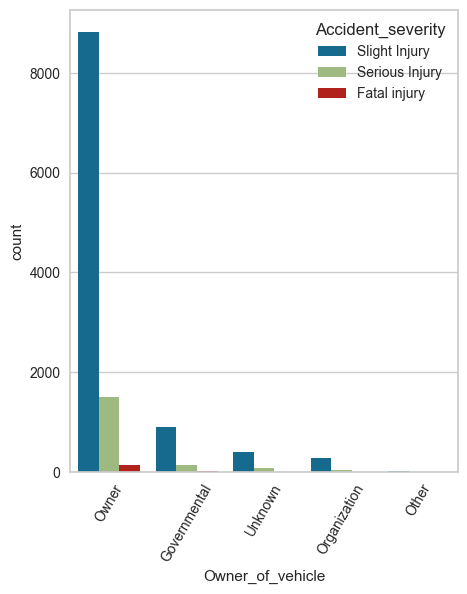

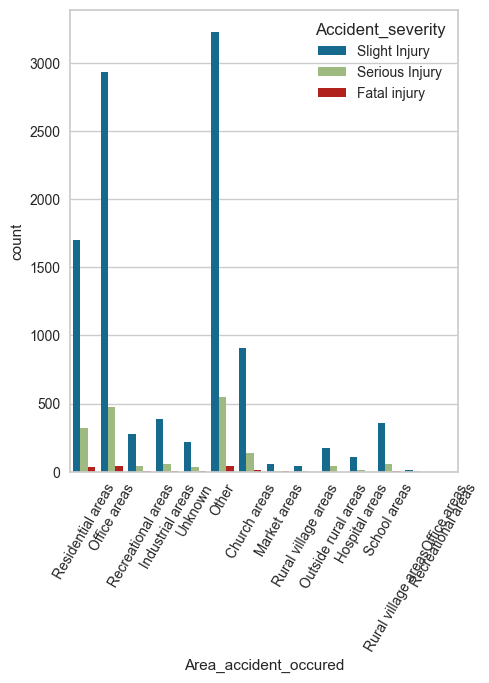

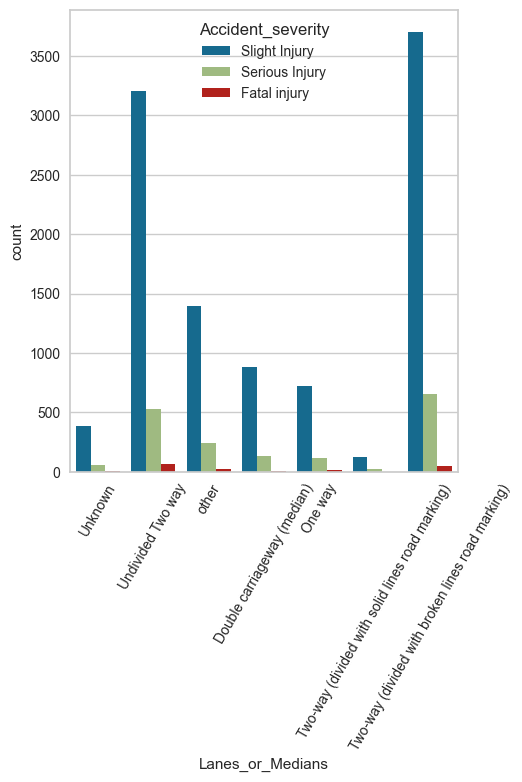

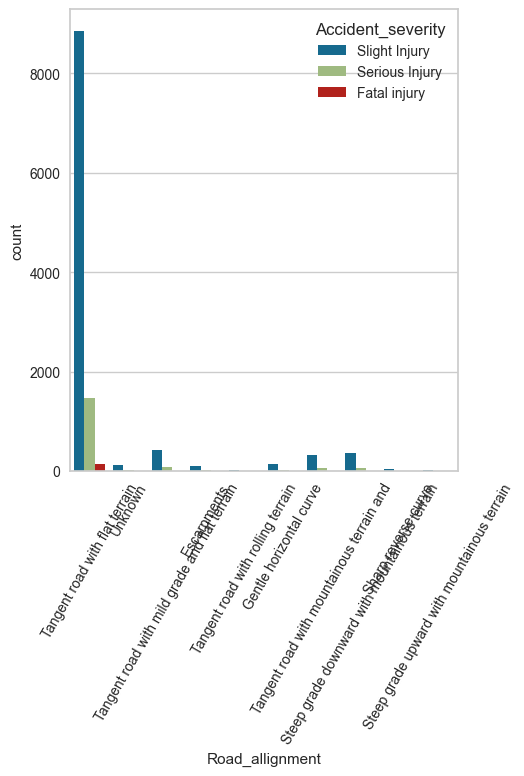

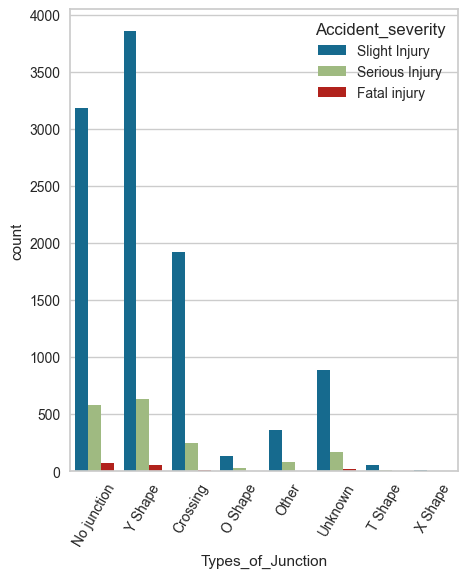

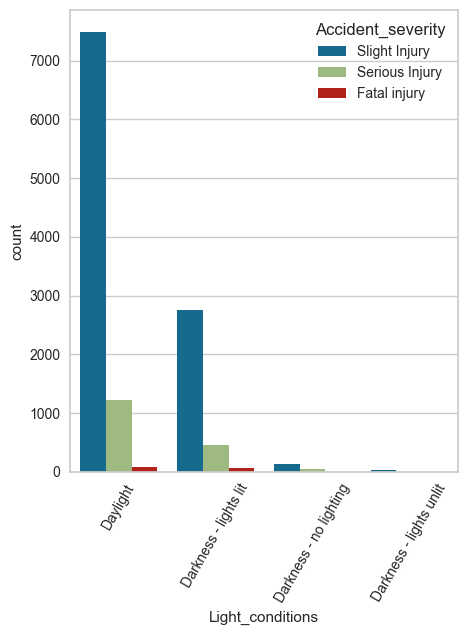

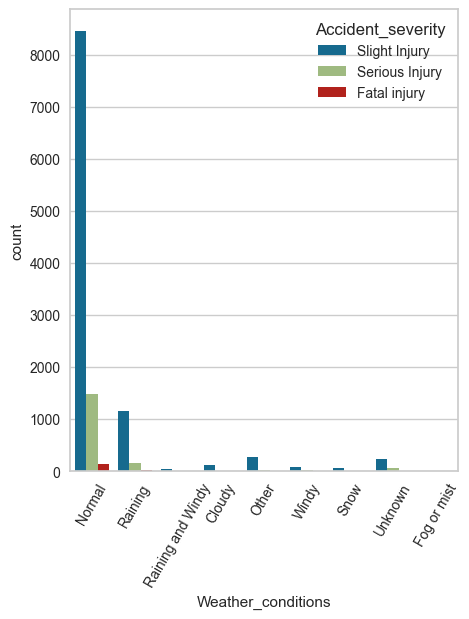

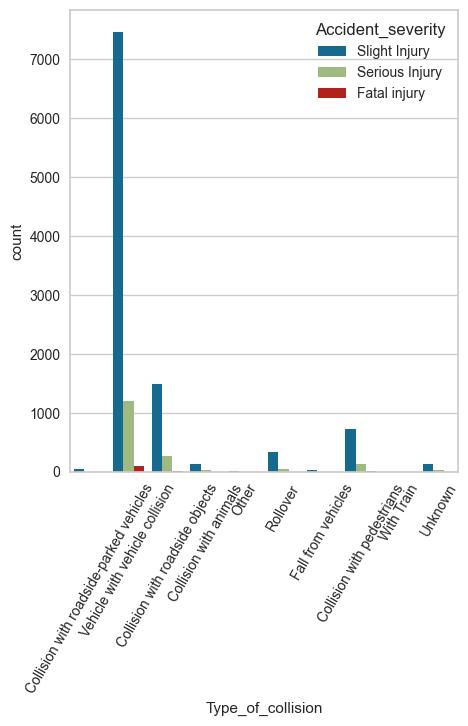

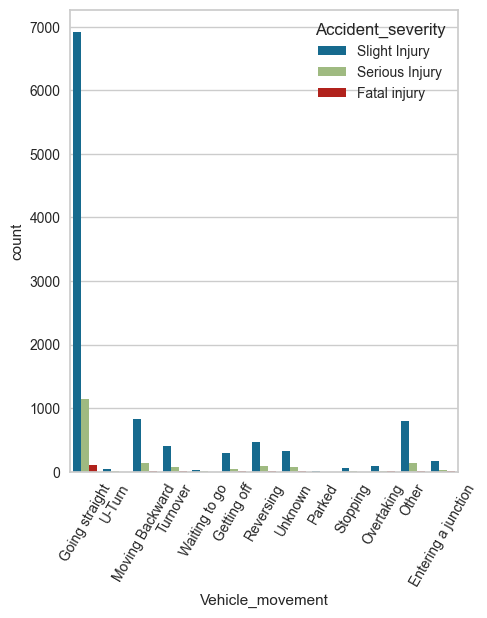

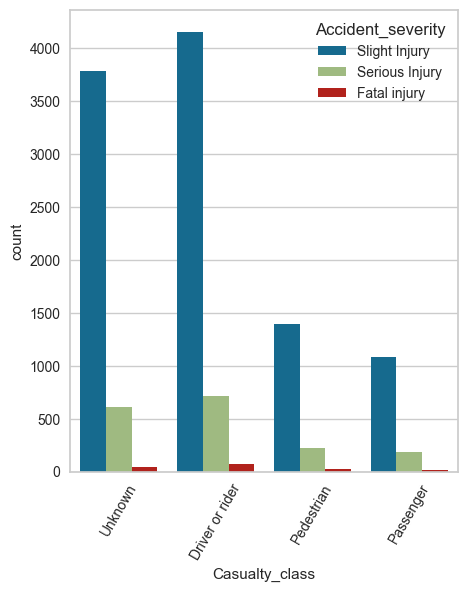

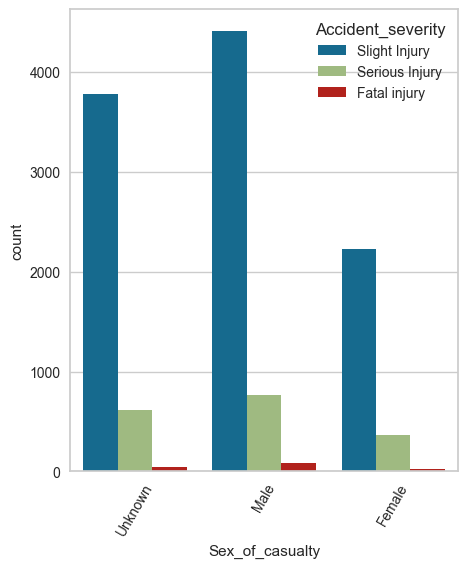

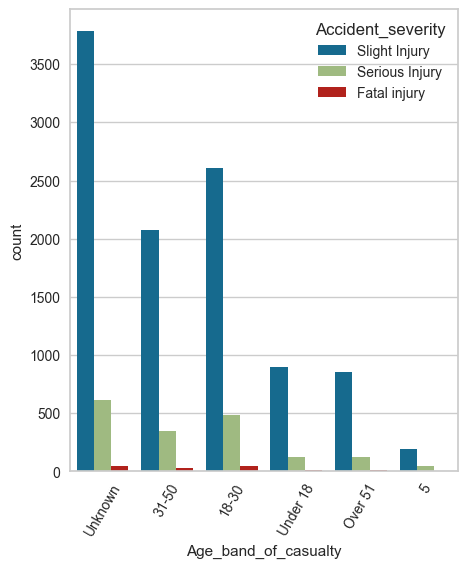

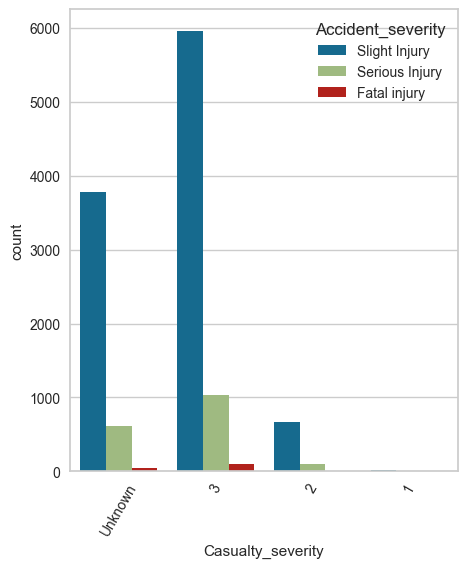

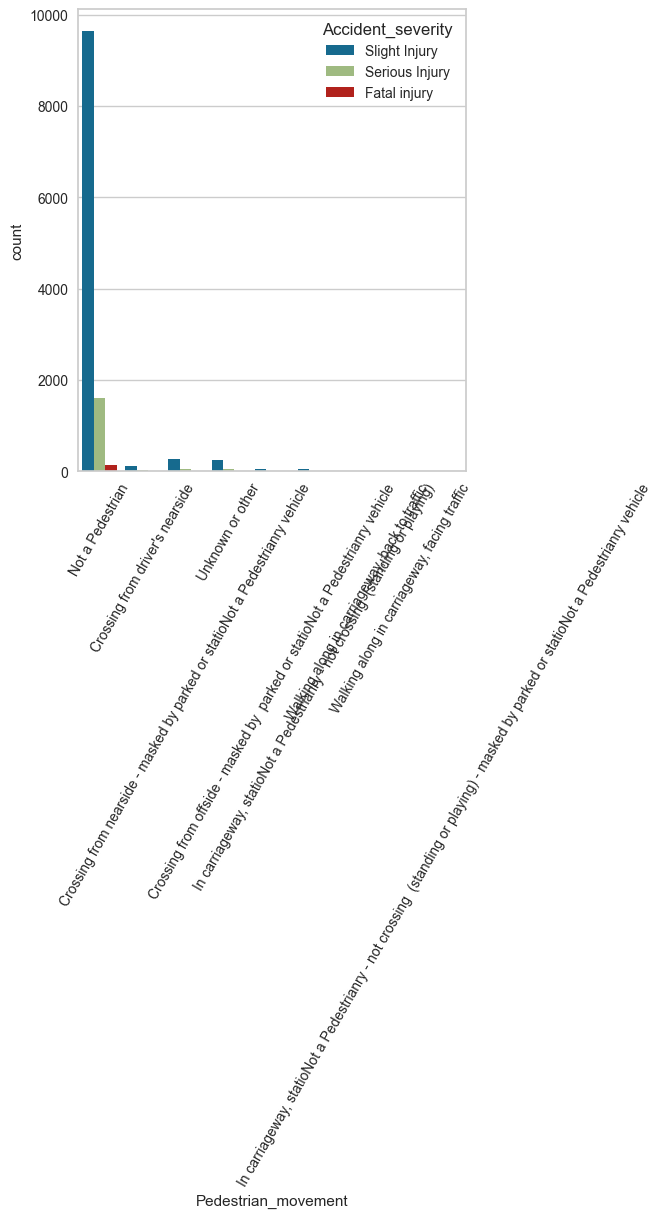

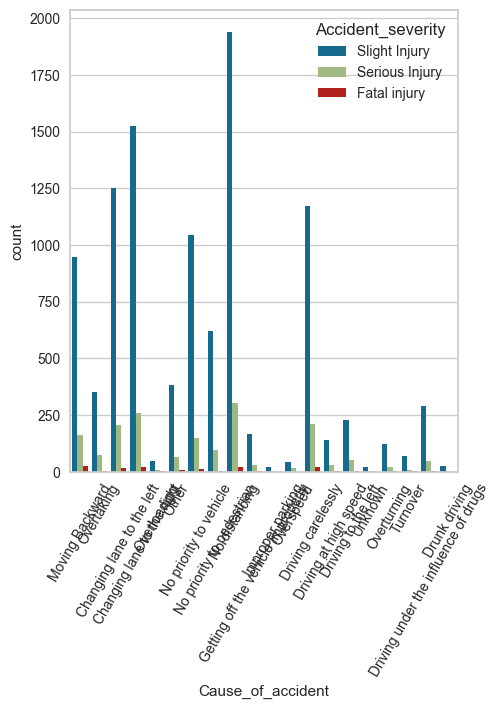

In [86]:
def countPlots(col):
    dataframe[col].value_counts()
    plt.figure(figsize=(5,6))
    sns.countplot(x=col, hue='Accident_severity', data=dataframe)
    plt.xlabel(f'{col}')
    plt.xticks(rotation=60)
    plt.show

#using categorical array from above
for col in categorical:
    #excluding road surface , road conditions, Accident_severity and education level as already visualized above
    if(col!='Road_surface_type' and col!='Road_surface_conditions' and col!='Educational_level' and col!='Accident_severity'):
        countPlots(col)


<Figure size 500x500 with 0 Axes>

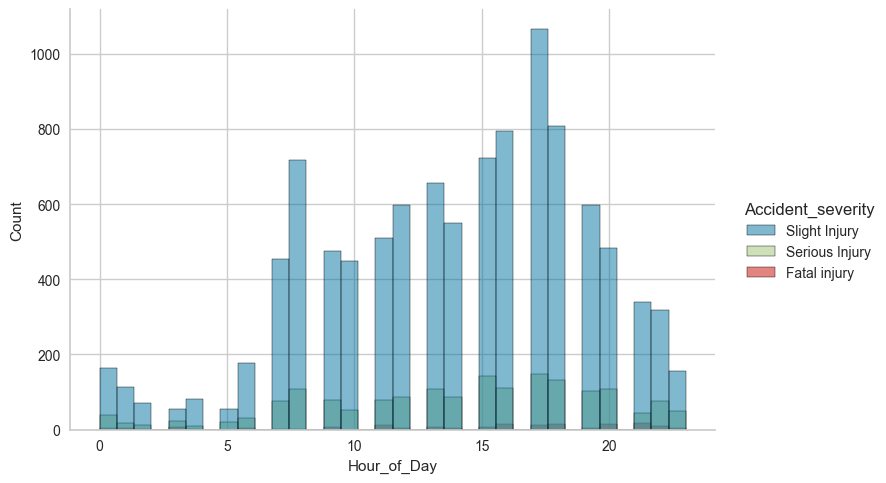

In [87]:
# disribution for hour of the day
plt.figure(figsize=(5,5))
sns.displot(x='Hour_of_Day', hue='Accident_severity', data=dataframe, aspect=1.5)
plt.show()

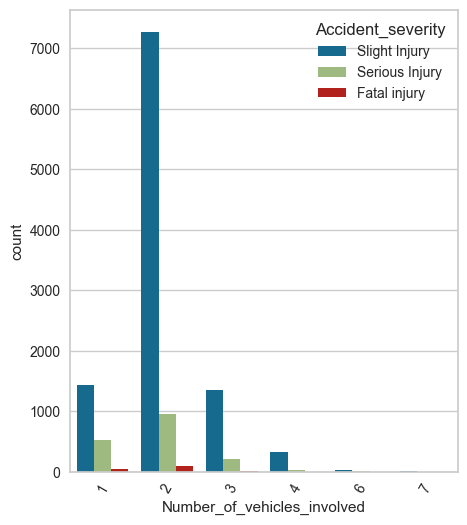

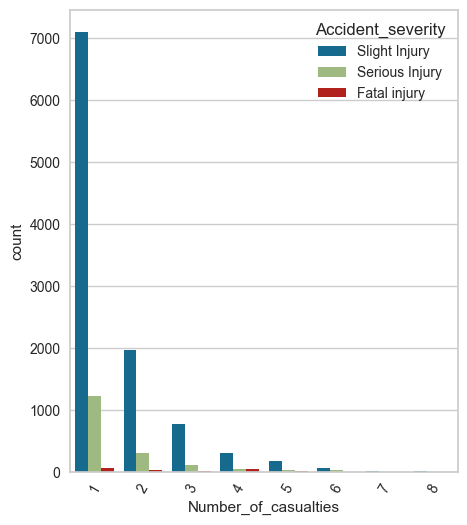

In [88]:
#Visulizing numerical cols wrt to accident severity
numerical_cols = ["Number_of_vehicles_involved", 'Number_of_casualties']

#using categorical array from above
for col in numerical_cols:
    countPlots(col)



<AxesSubplot: >

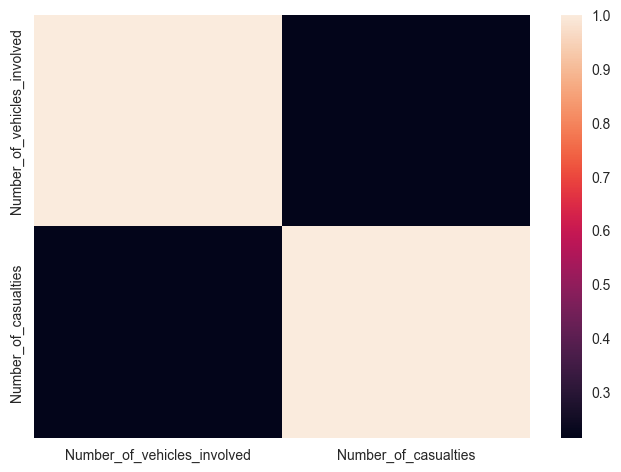

In [89]:
# showing relationship between number of vehicles and number of casualties
numerical_df = dataset.filter(["Number_of_vehicles_involved", 'Number_of_casualties'], axis=1)
sns.heatmap(numerical_df.corr())

# there seems to be no relationship between these two

1) Data is highly imbalanced
2) Hour of day seems to be important to predict accident severity
3) categorical cols need to be encoded
4) chi square analysis need to be done for feature selection

3 - Feature Selection

In [90]:
#label encoding
new_df = dataframe.copy()
label_encoder_x = preprocessing.LabelEncoder()
for i in new_df.columns:
    label_encoder_x.fit(new_df[i])
    new_df[i]= label_encoder_x.fit_transform(new_df[i])
new_df

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,...,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity,Hour_of_Day
0,1,0,1,0,0,0,0,3,9,5,...,1,2,3,2,5,3,5,9,2,17
1,1,1,1,4,0,3,7,3,6,4,...,1,2,3,2,5,3,5,16,2,17
2,1,0,1,4,0,0,3,3,1,6,...,1,2,0,1,1,2,5,0,1,17
3,3,0,1,4,0,2,7,0,6,6,...,1,2,2,0,0,2,5,1,2,1
4,3,0,1,4,0,1,13,3,4,6,...,1,2,3,2,5,3,5,16,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,6,1,1,5,0,1,3,3,5,4,...,0,2,3,2,5,3,5,10,2,16
12312,3,4,1,1,0,2,0,3,5,2,...,0,4,3,2,5,3,5,10,2,18
12313,3,2,1,4,0,2,1,3,5,2,...,0,4,0,1,1,2,5,1,1,13
12314,3,0,0,4,0,3,3,3,6,4,...,0,4,3,2,5,3,5,5,2,13


In [91]:
target_en = new_df['Accident_severity']
feature_df = new_df.copy()
feature_df = feature_df.drop(['Accident_severity','Number_of_vehicles_involved','Number_of_casualties'], axis=1)
feature_df




,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,...,Weather_conditions,Type_of_collision,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Hour_of_Day
0,1,0,1,0,0,0,0,3,9,5,...,2,3,2,3,2,5,3,5,9,17
1,1,1,1,4,0,3,7,3,6,4,...,2,8,2,3,2,5,3,5,16,17
2,1,0,1,4,0,0,3,3,1,6,...,2,2,2,0,1,1,2,5,0,17
3,3,0,1,4,0,2,7,0,6,6,...,2,8,2,2,0,0,2,5,1,1
4,3,0,1,4,0,1,13,3,4,6,...,2,8,2,3,2,5,3,5,16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,6,1,1,5,0,1,3,3,5,4,...,2,8,2,3,2,5,3,5,10,16
12312,3,4,1,1,0,2,0,3,5,2,...,2,8,4,3,2,5,3,5,10,18
12313,3,2,1,4,0,2,1,3,5,2,...,2,8,4,0,1,1,2,5,1,13
12314,3,0,0,4,0,3,3,3,6,4,...,2,8,4,3,2,5,3,5,5,13


In [92]:
#using mutual info classification for feature selection
mi_calc = mutual_info_classif(feature_df, target_en, random_state=42)
mi_df = pd.DataFrame({'Columns':feature_df.columns, 'MI_score':mi_calc})
mi_df_sorted = mi_df.sort_values(by='MI_score',ascending=False).head(26)
mi_df_sorted

,Columns,MI_score
14,Light_conditions,0.009514
0,Day_of_week,0.006455
11,Types_of_Junction,0.006384
24,Hour_of_Day,0.004551
12,Road_surface_type,0.004438
18,Casualty_class,0.004370
19,Sex_of_casualty,0.003203
17,Vehicle_movement,0.003013
7,Owner_of_vehicle,0.002742
5,Driving_experience,0.002311


In [93]:
#selectig columns with mi score gretaer than 0.0 i.e top 14
cols_list = list(mi_df_sorted['Columns'][:14])
feature_df2 = feature_df[cols_list]
feature_df2

,Light_conditions,Day_of_week,Types_of_Junction,Hour_of_Day,Road_surface_type,Casualty_class,Sex_of_casualty,Vehicle_movement,Owner_of_vehicle,Driving_experience,Casualty_severity,Road_surface_conditions,Educational_level,Type_of_collision
0,3,1,1,17,0,3,2,2,3,0,3,0,0,3
1,3,1,1,17,0,3,2,2,3,3,3,0,4,8
2,3,1,1,17,0,0,1,2,3,0,2,0,4,2
3,0,3,7,1,2,2,0,2,0,2,2,0,4,8
4,0,3,7,1,0,3,2,2,3,1,3,0,4,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,3,6,1,16,0,3,2,2,3,1,3,0,5,8
12312,3,3,1,18,0,3,2,4,3,2,3,0,1,8
12313,3,3,1,13,0,0,1,4,3,2,2,0,4,8
12314,0,3,1,13,0,3,2,4,3,3,3,0,4,8


In [94]:
#adding the numerical cols with categorical features
feature_df2 = pd.concat([feature_df2, new_df[['Number_of_vehicles_involved','Number_of_casualties']]], axis=1)
feature_list = list(feature_df2.columns)
feature_df2

,Light_conditions,Day_of_week,Types_of_Junction,Hour_of_Day,Road_surface_type,Casualty_class,Sex_of_casualty,Vehicle_movement,Owner_of_vehicle,Driving_experience,Casualty_severity,Road_surface_conditions,Educational_level,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties
0,3,1,1,17,0,3,2,2,3,0,3,0,0,3,1,1
1,3,1,1,17,0,3,2,2,3,3,3,0,4,8,1,1
2,3,1,1,17,0,0,1,2,3,0,2,0,4,2,1,1
3,0,3,7,1,2,2,0,2,0,2,2,0,4,8,1,1
4,0,3,7,1,0,3,2,2,3,1,3,0,4,8,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,3,6,1,16,0,3,2,2,3,1,3,0,5,8,1,0
12312,3,3,1,18,0,3,2,4,3,2,3,0,1,8,1,0
12313,3,3,1,13,0,0,1,4,3,2,2,0,4,8,0,0
12314,0,3,1,13,0,3,2,4,3,3,3,0,4,8,1,0


Modelling


In [95]:
# Imbalance data treatment

oversample = SMOTE()
X_smoted, y_smoted = oversample.fit_resample(feature_df2, target_en)
y_smoted = pd.Series(y_smoted)
X_smoted.shape, y_smoted.shape


((31245, 16), (31245,))

In [96]:
y_smoted.value_counts()

Accident_severity
2    10415
1    10415
0    10415
Name: count, dtype: int64

<AxesSubplot: xlabel='Accident_severity', ylabel='count'>

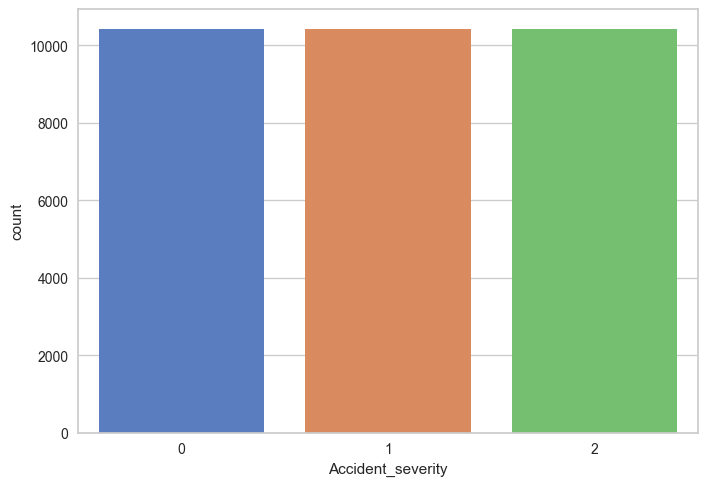

In [97]:
sns.countplot(x = y_smoted, palette='muted')

In [98]:
# train and test split
X_trn, X_tst, y_trn, y_tst = train_test_split(X_smoted, y_smoted, test_size=0.25, random_state=42)

print('Training Features Shape:', X_trn.shape)
print('Training Labels Shape:', y_trn.shape)
print('Testing Featured Shape:', X_tst.shape)
print('Testing Labels Shape:', y_tst.shape)

#to store all models results
models={}


Training Features Shape: (23433, 16)
Training Labels Shape: (23433,)
Testing Featured Shape: (7812, 16)
Testing Labels Shape: (7812,)


In [99]:
# Using random search to find the best hyperparameters
param_dist = {'n_estimators': randint(50,1000),
              'max_depth': randint(1,30),
              'random_state':randint(1,50)}

rf = RandomForestClassifier()
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)
rand_search.fit(X_trn, y_trn)

best_rf = rand_search.best_estimator_

print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 28, 'n_estimators': 428, 'random_state': 24}


In [100]:
def accuracyAndClassif(modelinstance, predics, modelname, printresults ):
    # train score 
    train_score = modelinstance.score(X_trn, y_trn)

    classif_svc = classification_report(y_tst,predics)

    f1score = f1_score(y_tst, predics, average='weighted')
    accuracy = accuracy_score(y_tst, predics, normalize=True, sample_weight=None)
    models[modelname] = {'accuracy':accuracy, 'f1score':f1score}

    if(printresults==True):
        print('train score : ', train_score)
        print(f'f1 score for {modelname}: ',f1score)
        print(f'classification for {modelname}')
        print(classif_svc)


    
    return accuracy, f1score

# modelling using random forest
def randomForestClassifier(X_trn, y_trn, X_tst, y_tst):

    #using the best hyperparameters from step before
    rf = RandomForestClassifier(n_estimators=636, max_depth=19, random_state=48)
    rf.fit(X_trn, y_trn)
    # predicting on test data
    predics = rf.predict(X_tst)
    accuracyAndClassif(rf, predics, 'RandomForestClassifier', True )
    return rf

rf = randomForestClassifier(X_trn, y_trn, X_tst, y_tst)

train score :  0.9914650279520335
f1 score for RandomForestClassifier:  0.9036949707073283
classification for RandomForestClassifier
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2599
           1       0.86      0.87      0.87      2639
           2       0.87      0.84      0.86      2574

    accuracy                           0.90      7812
   macro avg       0.90      0.90      0.90      7812
weighted avg       0.90      0.90      0.90      7812



In [101]:
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 3)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Feature: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Feature: Hour_of_Day          Importance: 0.152
Feature: Day_of_week          Importance: 0.11
Feature: Number_of_casualties Importance: 0.089
Feature: Number_of_vehicles_involved Importance: 0.084
Feature: Types_of_Junction    Importance: 0.082
Feature: Driving_experience   Importance: 0.071
Feature: Vehicle_movement     Importance: 0.066
Feature: Educational_level    Importance: 0.062
Feature: Type_of_collision    Importance: 0.057
Feature: Light_conditions     Importance: 0.046
Feature: Road_surface_conditions Importance: 0.046
Feature: Casualty_class       Importance: 0.038
Feature: Sex_of_casualty      Importance: 0.03
Feature: Owner_of_vehicle     Importance: 0.028
Feature: Casualty_severity    Importance: 0.022
Feature: Road_surface_type    Importance: 0.018


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

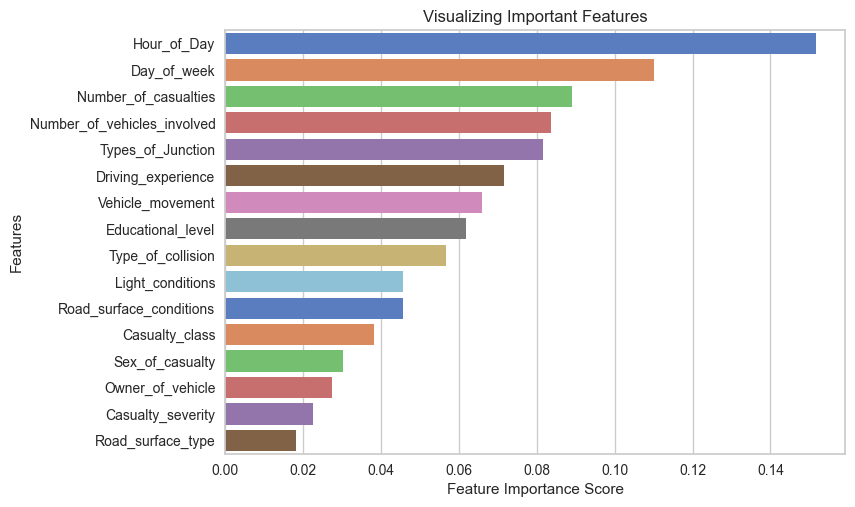

<Figure size 20000x35000 with 0 Axes>

In [102]:
#feature plot based on importance
feature_scores = pd.Series(rf.feature_importances_, index=X_trn.columns).sort_values(ascending=False)
sns.barplot(x=feature_scores, y=feature_scores.index, palette='muted')

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.figure(figsize=(200,350))
plt.show()


In [103]:
#implementing knn classfier
def knnClassifier(k, printResults):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_trn, y_trn)
    # predicting on test data
    predics = knn.predict(X_tst)

    accuracy, f1score = accuracyAndClassif(knn, predics, 'knnClassifier', printResults)
    print(f'For k={k} accuracy: {accuracy} and f1score : {f1score}')


for k in range(1,30):
    knnClassifier(k, False)


For k=1 accuracy: 0.8854326676907323 and f1score : 0.8819879068364017
For k=2 accuracy: 0.8330773169482847 and f1score : 0.8195807791309785
For k=3 accuracy: 0.8594470046082949 and f1score : 0.8524784019103279
For k=4 accuracy: 0.8238607270865336 and f1score : 0.8084996361433849
For k=5 accuracy: 0.8401177675371224 and f1score : 0.8300860837690892
For k=6 accuracy: 0.8141321044546851 and f1score : 0.7972208308933986
For k=7 accuracy: 0.8261648745519713 and f1score : 0.8139960164809728
For k=8 accuracy: 0.804147465437788 and f1score : 0.7852652708825918
For k=9 accuracy: 0.8123399897593446 and f1score : 0.7984499097686741
For k=10 accuracy: 0.7976190476190477 and f1score : 0.7784333473964277
For k=11 accuracy: 0.8018433179723502 and f1score : 0.7861796168497198
For k=12 accuracy: 0.7919866871479775 and f1score : 0.7721984320311706
For k=13 accuracy: 0.7974910394265233 and f1score : 0.7816007885685825
For k=14 accuracy: 0.7837941628264209 and f1score : 0.7635491810104341
For k=15 accurac

In [104]:
#from above we run for k=1 and see detailed results
knnClassifier(1, True)

train score :  0.9980369564289677
f1 score for knnClassifier:  0.8819879068364017
classification for knnClassifier
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      2599
           1       0.79      0.95      0.87      2639
           2       0.94      0.70      0.80      2574

    accuracy                           0.89      7812
   macro avg       0.90      0.88      0.88      7812
weighted avg       0.90      0.89      0.88      7812

For k=1 accuracy: 0.8854326676907323 and f1score : 0.8819879068364017


In [105]:
#comparing both models scores

alg=[]
acc=[]
f1scores=[]
for key in models:
    alg.append(key)
    acc.append(models[key]['accuracy'])
    f1scores.append(models[key]['f1score'])

Accuracy_Scores=pd.DataFrame({'Algorithms':alg, 'Accuracy': acc, 'f1scores': f1scores})
Accuracy_Scores.sort_values(by='Accuracy',ascending=False)

,Algorithms,Accuracy,f1scores
0,RandomForestClassifier,0.904122,0.903695
1,knnClassifier,0.885433,0.881988


In [106]:
#cross validation for randomforestclassifier
# cv indicates folds in startifiedKfolds technique
## overfiting
score = cross_val_score(rf,X_smoted, y_smoted,scoring='accuracy', cv=10)
print(f'score are {score}')
print(f'score mean: {score.mean()}')

score are [0.83648    0.84384    0.8896     0.92288    0.93088    0.9340589
 0.93629962 0.92381562 0.92605634 0.93341869]
score mean: 0.9077329167733674
